In [1]:
import sqlite3, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
sns.set(style="whitegrid")


In [2]:
conn = sqlite3.connect("zenspace.db")
def run_query(q): 
    return pd.read_sql_query(q, conn)


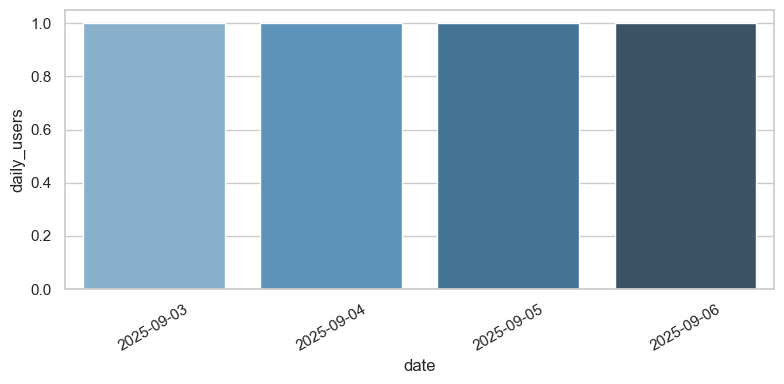

In [3]:
dau = run_query("""
SELECT DATE(started_at) AS date, COUNT(DISTINCT user_id) AS daily_users
FROM sessions GROUP BY DATE(started_at) ORDER BY DATE(started_at);
""")
plt.figure(figsize=(8,4))
sns.barplot(x="date", y="daily_users", data=dau, palette="Blues_d")
plt.xticks(rotation=30); plt.tight_layout(); plt.show()


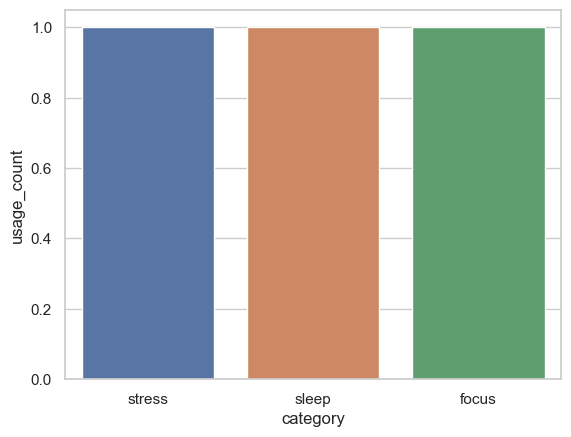

In [4]:
med = run_query("""
SELECT category, COUNT(*) AS usage_count
FROM sessions WHERE session_type='meditation'
GROUP BY category ORDER BY usage_count DESC;
""")
sns.barplot(x="category", y="usage_count", data=med); plt.show()


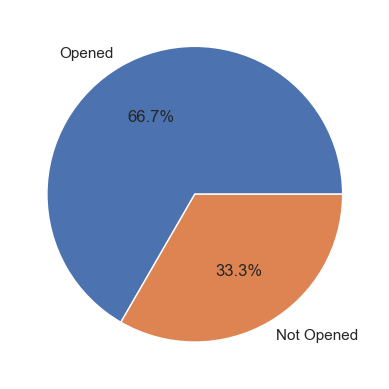

In [5]:
rem = run_query("SELECT COUNT(*) AS sent, SUM(CASE WHEN opened=1 THEN 1 ELSE 0 END) AS opened FROM reminders;")
sent = int(rem.sent[0]); opened = int(rem.opened[0])
plt.pie([opened, sent-opened], labels=["Opened","Not Opened"], autopct="%1.1f%%"); plt.show()


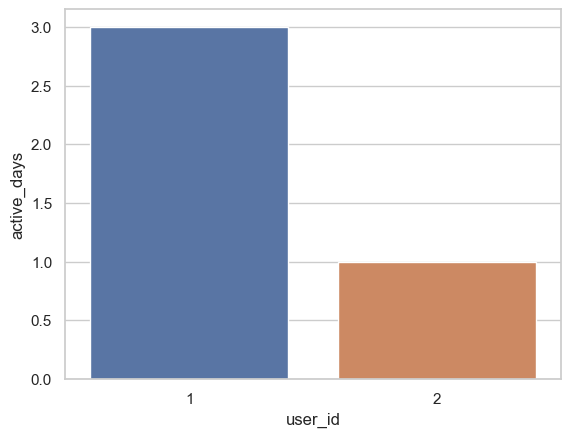

In [6]:
streaks = run_query("""
SELECT user_id, COUNT(DISTINCT DATE(started_at)) AS active_days
FROM sessions GROUP BY user_id ORDER BY active_days DESC LIMIT 10;
""")
sns.barplot(x="user_id", y="active_days", data=streaks); plt.show()
